In [2]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [3]:

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



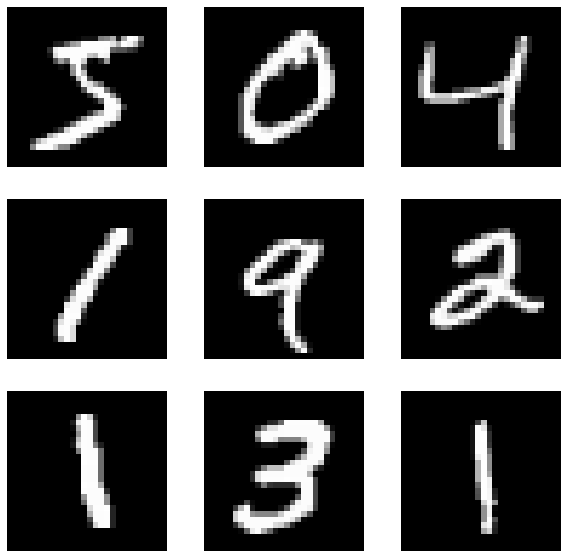

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  image = x_train[i]
  plt.imshow(image, cmap='gray')
  plt.axis("off")

In [6]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [9]:

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 7s 125us/sample - loss: 0.3764 - accuracy: 0.8853 - val_loss: 0.0820 - val_accuracy: 0.9792
Epoch 2/15
54000/54000 [==============================] - 4s 69us/sample - loss: 0.1136 - accuracy: 0.9658 - val_loss: 0.0592 - val_accuracy: 0.9830
Epoch 3/15
54000/54000 [==============================] - 4s 70us/sample - loss: 0.0856 - accuracy: 0.9737 - val_loss: 0.0476 - val_accuracy: 0.9872
Epoch 4/15
54000/54000 [==============================] - 4s 74us/sample - loss: 0.0724 - accuracy: 0.9779 - val_loss: 0.0410 - val_accuracy: 0.9892
Epoch 5/15
54000/54000 [==============================] - 4s 72us/sample - loss: 0.0637 - accuracy: 0.9802 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 6/15
54000/54000 [==============================] - 4s 69us/sample - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0396 - val_accuracy: 0.9893
Epoch 7/15
54000/54000 [==============================] 

In [5]:

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.0261699911299831
Test accuracy: 0.9909
